In [46]:
# Set proper path
import os
current_dir = os.getcwd()
if "notebooks" in current_dir:
    current_dir = os.chdir("../")

from src.models.train_model import load_dataset, load_model
import torch
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Load dataset
model = load_model("final_real2", "ImprovedCNN")#load_model("Improved_CNN", "ImprovedCNN")
model.eval()

Model 'final_real2' loaded with architecture 'ImprovedCNN'


ImprovedCNN(
  (conv1): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): Sigmoid()
  (dropout): Dropout(p=0.25, inplace=False)
)

In [102]:
data_loader = load_dataset(5, "supervised") #inference

In [103]:
sample_image, sample_mask, image_info = next(iter(data_loader))

In [104]:
sample_mask=sample_mask[:,:,:,:200]

In [105]:
sample_image= sample_image[:,:,:,:200]

In [106]:
prediction = model(sample_image)

In [107]:
#data_loader = load_dataset(1, "inference")
#sample_image, sample_mask, image_info = next(iter(data_loader))
#prediction = model(sample_image)

sample_image = sample_image.numpy()
sample_mask = sample_mask.numpy()
prediction = prediction.detach().numpy()

In [108]:
np.shape(sample_mask)

(2, 1, 200, 200)

Text(0.5, 1.0, 'Data Based Simulation')

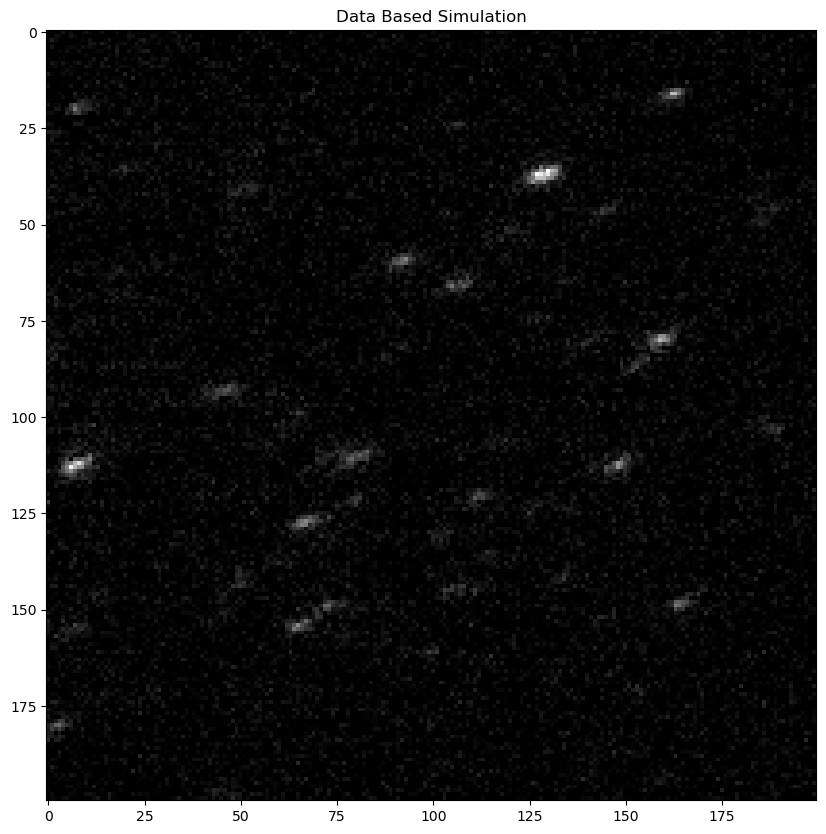

In [109]:
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(sample_image[0, 2, :, :], cmap="gray")
plt.title("Data Based Simulation")

Text(0.5, 1.0, 'Ground truth')

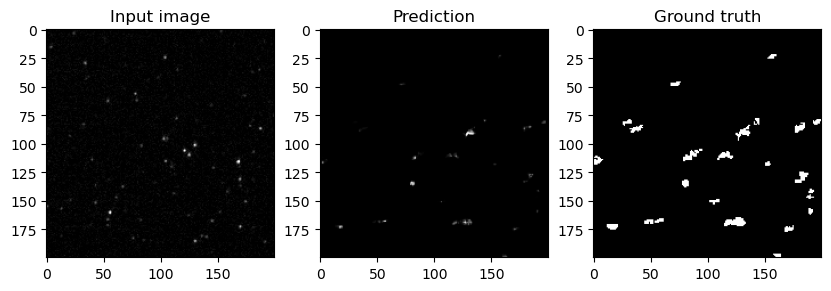

In [118]:
batch = 1
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(sample_image[batch, 2, :, :], cmap="gray")
plt.title("Input image")
plt.subplot(1, 3, 2)
plt.imshow(prediction[batch, 0, :, :], cmap="gray")
plt.title("Prediction")
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(sample_mask[batch, 0, :, :], cmap="gray")
plt.title("Ground truth")


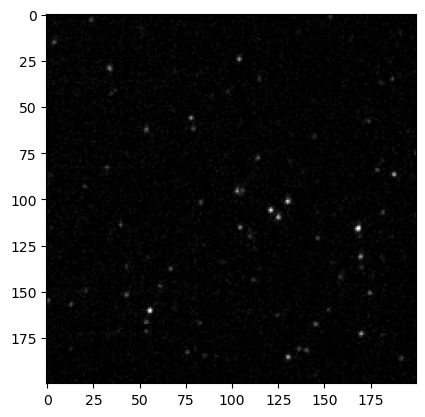

In [119]:
fig1 = plt.imshow(sample_image[batch, 2, :, :], cmap="gray")

In [115]:
plt.figure()
fig1
plt.show()

<Figure size 640x480 with 0 Axes>

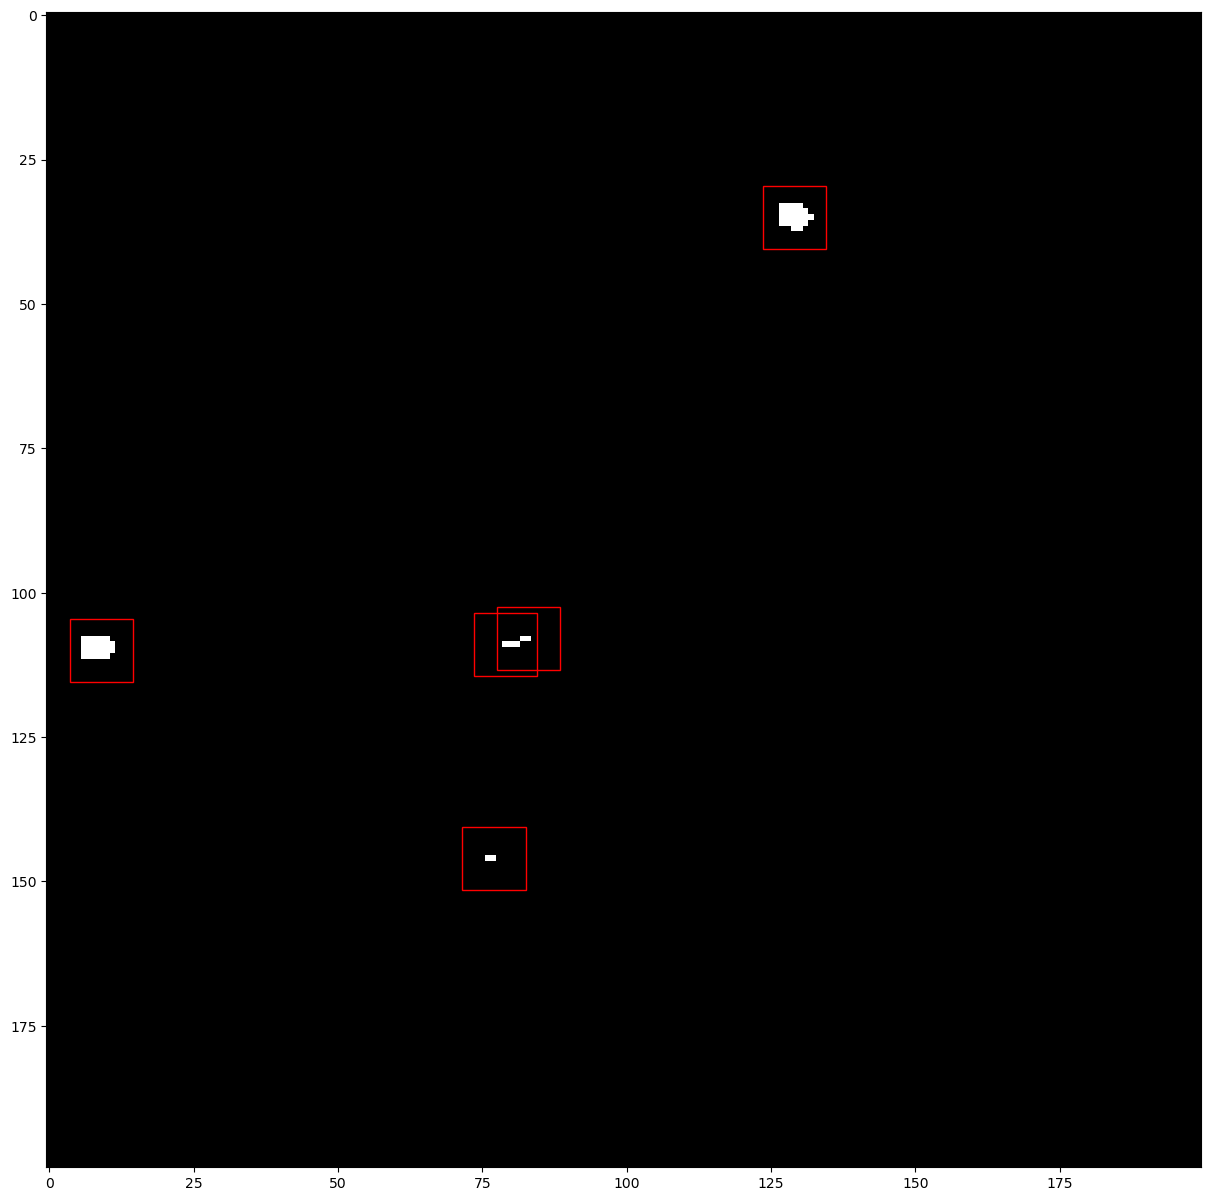

In [111]:
from matplotlib.patches import Rectangle
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
mask = prediction[0, 0, :, :] > 0.1
# Label connected components in the mask
labels, num_labels = ndimage.label(mask)

# Calculate the Euclidean distance transform of the labeled mask
distances = ndimage.distance_transform_edt(mask)

# Find the maximum position (centroid) of each labeled component
centroids = ndimage.maximum_position(distances, labels, range(1, num_labels + 1))

# Calculate the radius that surrounds all the points in the grouping
max_distance = distances.max()
radius = max_distance*2 + 1

# Plot the mask
plt.figure(figsize=(15, 15))
plt.imshow(mask, cmap='gray')
#shift= 200
#plt.xlim(0+shift, 100+shift)
#plt.ylim(0, 100)

# Plot rectangles for each centroid
for centroid in centroids:
    x = centroid[1] - radius
    y = centroid[0] - radius
    width = 2 * radius
    height = 2 * radius
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='r')
    plt.gca().add_patch(rectangle)

plt.show()

In [28]:
len(centroids)

18

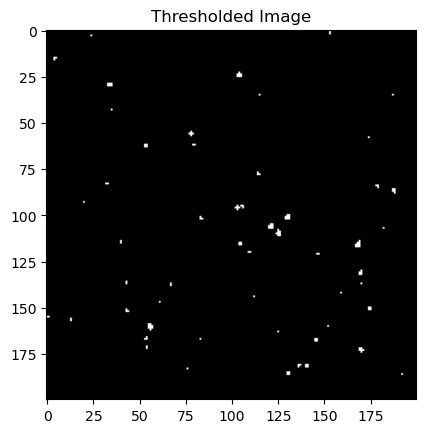

In [129]:
import scipy.ndimage as ndimage

threshold_value = 0.2
thresholded_image = sample_image > threshold_value
plt.imshow(thresholded_image[batch, 2, :, :], cmap="gray")
plt.title("Thresholded Image")
plt.show()


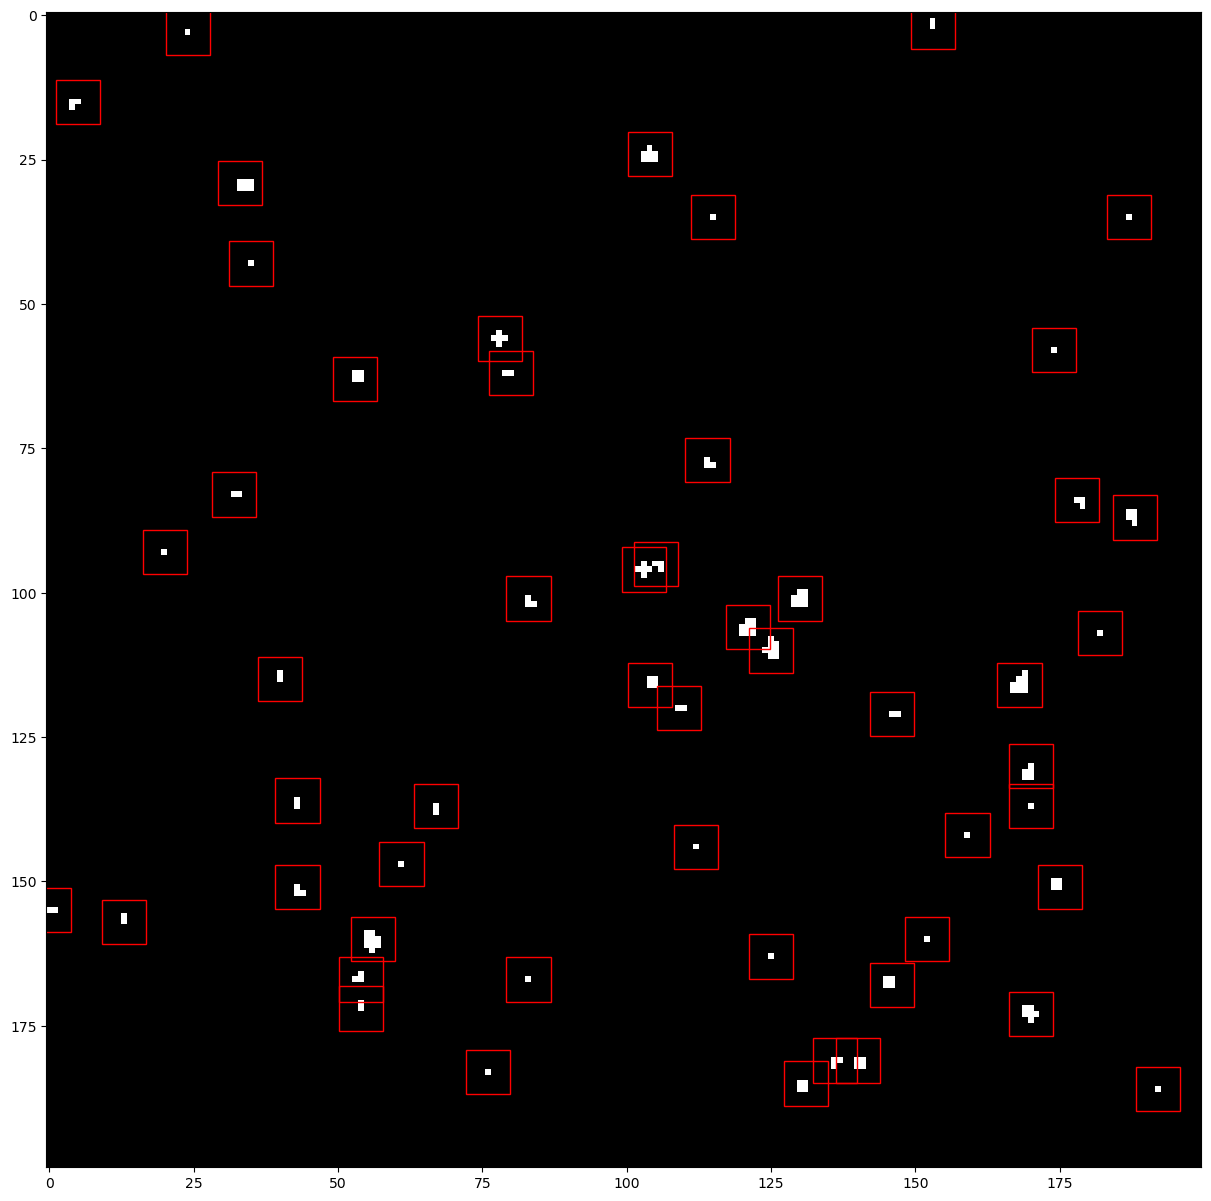

In [130]:
from matplotlib.patches import Rectangle
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
mask = thresholded_image[batch, 2, :, :]
# Label connected components in the mask
labels, num_labels = ndimage.label(mask)

# Calculate the Euclidean distance transform of the labeled mask
distances = ndimage.distance_transform_edt(mask)

# Find the maximum position (centroid) of each labeled component
centroids = ndimage.maximum_position(distances, labels, range(1, num_labels + 1))

# Calculate the radius that surrounds all the points in the grouping
max_distance = distances.max()
radius = max_distance*2 + 1

# Plot the mask
plt.figure(figsize=(15, 15))
plt.imshow(mask, cmap='gray')
#shift= 200
#plt.xlim(0+shift, 100+shift)
#plt.ylim(0, 100)

# Plot rectangles for each centroid
for centroid in centroids:
    x = centroid[1] - radius
    y = centroid[0] - radius
    width = 2 * radius
    height = 2 * radius
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='r')
    plt.gca().add_patch(rectangle)

plt.show()

In [131]:
len(centroids)

53

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(sample_image[0, 2, :, :], cmap="gray")
plt.title("Input image")
plt.subplot(1, 3, 2)
plt.imshow(prediction[0, 0, :, :], cmap="gray")
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(sample_mask[0, 0, :, :], cmap="gray")
plt.title("Prediction")